Logistic回归梯度上升优化算法

In [1]:
from numpy import *

#读取数据
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open("testSet.txt")
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

#sigmoid函数
def sigmoid(inX):
    return 1.0/(1.0 + exp(- inX))

# 梯度上升算法
def gradAscent(dataMatIn, classLabels):
    # 把输入数据转化为Numpy数组
    dataMatrix = mat(dataMatIn)
    # transpose()是对矩阵进行转置
    labelMat = mat(classLabels).transpose()
    m,n = shape(dataMatrix)
    #步长即学习率
    alpha = 0.001
    # 最大迭代次数
    maxCycless = 500
    weights = ones((n,1))
    for k in range(maxCycless):
        h = sigmoid(dataMatrix * weights)
        error =(labelMat - h)
        weights = weights + alpha*dataMatrix.transpose()*error
    return weights

if __name__ == "__main__":
    dataMat,labelMat = loadDataSet()
    matrix = gradAscent(dataMat,labelMat)
    print(matrix)
    

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


分析数据：画出决策边界

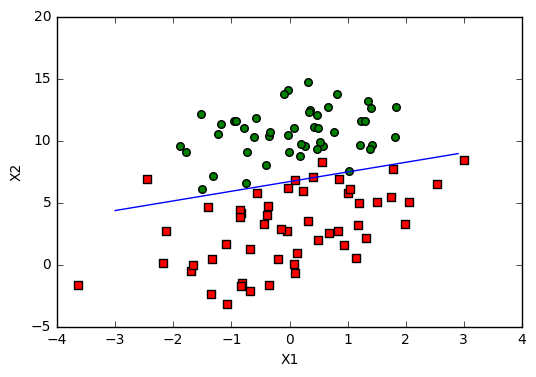

In [2]:
import matplotlib.pyplot as plt
def plotBestFit(weights):
    dataMat,labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if(int(labelMat[i]) == 1):
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s = 30,c = 'red',marker = 's')
    ax.scatter(xcord2,ycord2,s = 30,c = 'green' )
    # 0.1是步长 -3-3之间每0.1增加一个数字
    x = arange(-3.0,3.0,0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()
if __name__ == "__main__":
    dataMat,labelMat = loadDataSet()
    weights = gradAscent(dataMat,labelMat)
    plotBestFit(weights.getA())
    
    

随机梯度上升算法

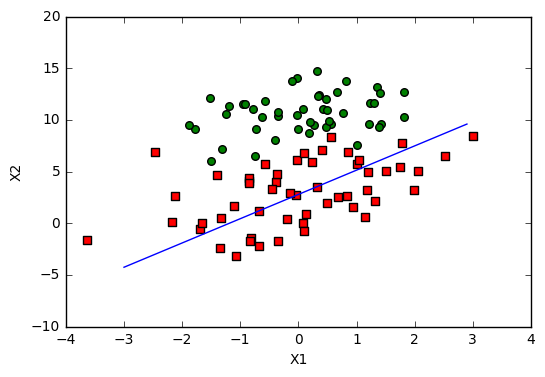

In [3]:
def stocGradAscent0(dataMatrix,classLabels):
    m,n =shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] * weights))
        error = classLabels[i] - h
        weights = weights + alpha * error* dataMatrix[i]
    return weights
if __name__ == "__main__":
    dataMat,labelMat = loadDataSet()
    weights = stocGradAscent0(array(dataMat),labelMat)
    plotBestFit(weights)
    

改进的随机梯度上升算法 alpha每次迭代需要调整

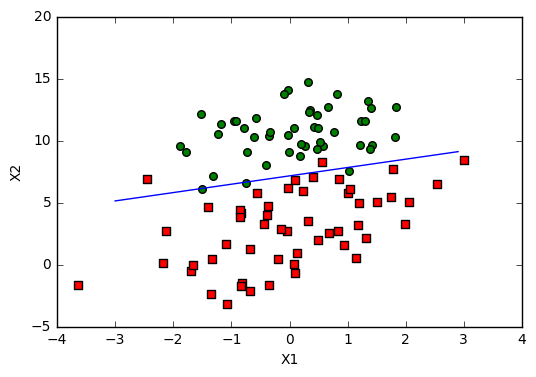

In [4]:
def stocGradAscent1(dataMatrix,classLabels,numIter = 150):
    m,n =shape(dataMatrix)
    weights = ones(n)
    
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+i+j)+0.01
            # 随机选取样本更新回归系数
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error* dataMatrix[randIndex]
          
    return weights
if __name__ == "__main__":
    dataMat,labelMat = loadDataSet()
    weights = stocGradAscent1(array(dataMat),labelMat)
    plotBestFit(weights)
    

测试算法：用Logistic回归进行分类

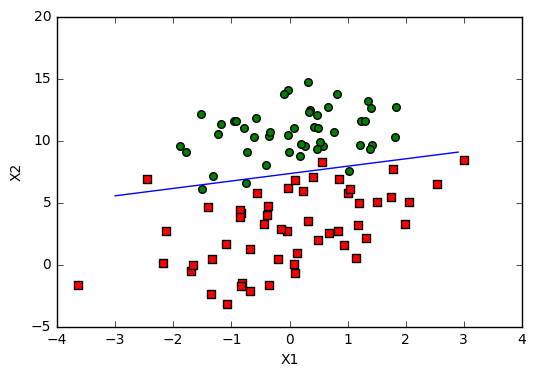

C:\Users\杨征\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: overflow encountered in exp


the error rate of the test is:0.358209
the error rate of the test is:0.253731
the error rate of the test is:0.283582
the error rate of the test is:0.597015
the error rate of the test is:0.343284
the error rate of the test is:0.268657
the error rate of the test is:0.298507
the error rate of the test is:0.283582
the error rate of the test is:0.537313
the error rate of the test is:0.253731
the error rate of the test is:0.462687
after10 iterations the average error rate is:0.358209


In [6]:
def classifyVector(inX,weights):
    prob = sigmoid(sum(inX * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0
# 打开测试集和训练集，并对数据进行格式化处理
def colinTest():
    frTrain = open("horseColicTraining.txt")
    frTest = open("horseColicTest.txt")
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet),trainingLabels,500)
    errorcount = 0.0
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr),trainWeights)!= int(currLine[21])):
            errorcount += 1
    
    errorRate = (float(errorcount)/numTestVec)
    print("the error rate of the test is:%f" %errorRate)
    return errorRate


def multiTest():
    numTests = 10
    errorSum =0.0
    for k in range(numTests):
        errorSum += colinTest()
    print("after%d iterations the average error rate is:%f" %(numTests,errorSum/numTests))
    


if __name__ == "__main__":
    dataMat,labelMat = loadDataSet()
    weights = stocGradAscent1(array(dataMat),labelMat)
    plotBestFit(weights)
    colinTest()
    multiTest()
    